In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('All_Extracted_Data_From_PDFs.csv')

In [3]:
data.head()

,Filename,Date,Year,Amount_in_usd,Country,Country_Code,Income_level,Region,Topic
0,1990_april_24_587321468019152780_conformed-cop...,1990-04-24,1990,80000000.0,Cote d'Ivoire,CIV,Lower middle income,Sub-Saharan Africa,Agriculture
1,1990_april_24_668811468165272290_conformed-cop...,1990-04-24,1990,2500000.0,St. Lucia,LCA,Upper middle income,Latin America & Caribbean,Water Works
2,1990_april_25_904191468298750561_conformed-cop...,1990-04-25,1990,18000000.0,Poland,POL,High income,Europe & Central Asia,Other
3,1990_april_30_410811468040573756_conformed-cop...,1990-04-30,1990,329000000.0,Indonesia,IDN,Upper middle income,East Asia & Pacific,Rural Development
4,1990_april_30_725911468042268845_conformed-cop...,1990-04-30,1990,350000000.0,Indonesia,IDN,Upper middle income,East Asia & Pacific,Other


In [4]:
edu_data = data.loc[lambda data: data['Topic'] == 'Education']

In [5]:
edu_data.head()

,Filename,Date,Year,Amount_in_usd,Country,Country_Code,Income_level,Region,Topic
6,1990_august_10_460651468271855106_conformed-co...,1990-08-10,1990,45000000.0,"Korea, Rep.",KOR,High income,East Asia & Pacific,Education
9,1990_august_13_930351468250521631_conformed-co...,1990-08-13,1990,25000000.0,India,IND,Lower middle income,South Asia,Education
25,1990_february_12_603871468052164505_conformed-...,1990-02-12,1990,154200000.0,Indonesia,IDN,Upper middle income,East Asia & Pacific,Education
60,1990_july_9_673731468058475489_conformed-copy-...,1990-07-09,1990,200000000.0,Philippines,PHL,Lower middle income,East Asia & Pacific,Education
91,1990_may_18_631461468313480210_conformed-copy-...,1990-05-18,1990,90200000.0,Mali,MLI,Low income,Sub-Saharan Africa,Education


In [6]:
countryset = set(data.Country)

In [7]:
yearset = set(data.Year)
print(yearset)

{1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019}


In [8]:
codeset = set(data.Country_Code)

In [9]:
edu_dict = {'Country':[],'Country_Code':[],'Year':[],'Amount':[]}
edu_DF = pd.DataFrame(edu_dict)
edu_DF.columns

Index(['Country', 'Country_Code', 'Year', 'Amount'], dtype='object')

In [10]:
for country in countryset:
    for year in yearset:
        for i in edu_data.index:
            if edu_data.Country[i] == country and edu_data.Year[i] == year:
                df = pd.DataFrame([[country,edu_data.Country_Code[i],year,edu_data.Amount_in_usd[i]]],columns = edu_DF.columns)
                edu_DF = edu_DF.append(df)
                
            
        
            
    

In [11]:
edu_DF.to_csv('edudf.csv')

In [12]:
edu_DF.reset_index()

,index,Country,Country_Code,Year,Amount
0,0,Belarus,BLR,2015.0,5.000000e+07
1,0,Belarus,BLR,2019.0,1.007527e+08
2,0,Costa Rica,CRI,1991.0,2.300000e+07
3,0,Costa Rica,CRI,2012.0,2.000000e+08
4,0,St. Kitts and Nevis,KNA,2002.0,5.000000e+06
...,...,...,...,...,...
162,0,Algeria,DZA,1994.0,5.100000e+07
163,0,Guatemala,GTM,2002.0,6.216000e+07
164,0,Guatemala,GTM,2008.0,8.000000e+07
165,0,North Macedonia,MKD,2004.0,5.000000e+06


In [13]:
for country in countryset:
    for year in yearset:
        amount_sum = edu_DF.loc[(edu_DF['Country'] == country) & (edu_DF['Year'] == year)]['Amount'].sum()
        edu_DF['Sum'] = amount_sum
        
        

In [14]:
for country in countryset:
    df = edu_DF.loc[lambda edu_DF: edu_DF['Country'] == country]
    #print(country,min(df.Year),max(df.Year))
    if len(df.Year)>0:
        print(country,set(df.Year))
    #else:
        #print('empty',country)
    

Belarus {2019.0, 2015.0}
Costa Rica {2012.0, 1991.0}
St. Kitts and Nevis {2002.0}
Egypt, Arab Rep. {2002.0, 2018.0}
Jamaica {2008.0, 2014.0}
Dominica {2019.0, 1995.0, 2002.0, 2006.0, 2015.0}
Hungary {1997.0, 1998.0}
Trinidad and Tobago {1995.0}
China {2017.0, 2018.0, 1996.0, 1999.0, 2003.0, 2010.0, 2012.0, 2013.0, 2015.0}
Sri Lanka {2017.0}
India {2017.0, 1990.0}
St. Lucia {2002.0, 1995.0}
Romania {1994.0, 1996.0, 1997.0}
St. Vincent and the Grenadines {2004.0}
Brazil {2018.0, 2002.0, 2009.0, 2010.0, 2012.0}
Belize {1992.0}
Paraguay {1995.0, 2003.0}
El Salvador {1995.0, 2012.0, 2006.0, 1999.0}
Russian Federation {2002.0, 2004.0, 1996.0, 1997.0}
Panama {2008.0, 2001.0, 2007.0}
Armenia {2014.0}
Croatia {2005.0}
Uruguay {2002.0, 1994.0, 2017.0}
Jordan {2000.0, 2017.0, 1995.0, 2003.0}
Philippines {1992.0, 1996.0, 2006.0, 1990.0}
Argentina {2019.0, 1995.0, 1998.0, 2001.0, 2006.0}
Chile {2013.0, 2002.0, 1995.0, 2005.0}
Turkey {2002.0, 2019.0, 2006.0}
Lithuania {2002.0}
Georgia {2019.0}
Serbi

In [15]:
amount_sum_dict={'Country_Code':[],'Year':[],'Amount_sum':[]}
amount_sum_DF =pd.DataFrame(amount_sum_dict)

In [16]:
for code in codeset:
    df = edu_DF.loc[lambda edu_DF: edu_DF['Country_Code'] == code]
    if len(df.Year)>0:
        for year in df.Year:
            amount_sum = edu_DF.loc[(edu_DF['Country_Code'] == code) & (edu_DF['Year'] == year)]['Amount'].sum()
            df2 = pd.DataFrame([[code,year,amount_sum]],columns = amount_sum_DF.columns)
            amount_sum_DF = amount_sum_DF.append(df2)

            

     

In [17]:
amount_sum_DF= amount_sum_DF.drop_duplicates(subset ="Amount_sum")

In [18]:
amount_sum_DF = amount_sum_DF.reset_index()

In [19]:
amount_sum_DF.head()

,index,Country_Code,Year,Amount_sum
0,0,TUR,2002.0,3.000000e+08
1,0,TUR,2006.0,1.004479e+08
2,0,TUR,2019.0,2.995715e+08
3,0,BRA,2002.0,1.728509e+08
4,0,BRA,2009.0,1.540000e+08


In [27]:
indicator_dict = {'Country_Code':[],'Year':[],'-2':[],'-1':[],'0':[],'1':[],'2':[],'3':[],'4':[],'5':[]}
indicator_DF = pd.DataFrame(indicator_dict)
literacy = pd.read_csv('literacy.csv')

In [44]:
amount_sum_DF['-2'] = None
amount_sum_DF['-1'] = None
amount_sum_DF['0'] = None
amount_sum_DF['1'] = None
amount_sum_DF['2'] = None
amount_sum_DF['3'] = None
amount_sum_DF['4'] = None
amount_sum_DF['5'] = None



In [46]:
def compute_WB_data(wbdata,code,year):
    value = np.nan
    for j in wbdata.index:
            if wbdata.iloc[j,1] == code:
                for col in wbdata.columns:
                    if wbdata[col].iloc[3] == year:
                        value = wbdata[col].iloc[j]
                        break
    return value
    

In [47]:
for k in range(-2,6):
    for i in amount_sum_DF.index:
        code = amount_sum_DF.Country_Code[i]
        year = amount_sum_DF.Year[i] + k
        literacy_rate = compute_WB_data(literacy,code,year)
        amount_sum_DF[str(k)][i] = literacy_rate 

<ipython-input-47-2c61e9dd39cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amount_sum_DF[str(k)][i] = literacy_rate


In [48]:
amount_sum_DF.to_csv('yearliteracy.csv')

In [85]:
brazil2009 = list(amount_sum_DF.iloc[4,4:])
mexico2006 = list(amount_sum_DF.iloc[48,4:])
amount_sum_DF.head()

,index,Country_Code,Year,Amount_sum,-2,-1,0,1,2,3,4,5
0,0,TUR,2002.0,3.000000e+08,NaN,NaN,NaN,NaN,87.3655,88.2291,88.1194,88.6559
1,0,TUR,2006.0,1.004479e+08,87.3655,88.2291,88.1194,88.6559,NaN,90.8167,92.6606,94.1061
2,0,TUR,2019.0,2.995715e+08,96.1505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,BRA,2002.0,1.728509e+08,86.3679,NaN,NaN,NaN,88.6162,NaN,89.6152,90.0094
4,0,BRA,2009.0,1.540000e+08,90.0094,90.0366,90.2982,90.3792,91.4112,91.3379,91.4842,91.7294


In [86]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

In [95]:
latinliteracy = []
for year in range(2007,2015):
    ll = compute_WB_data(literacy,'LCN',year)
    latinliteracy.append(ll)


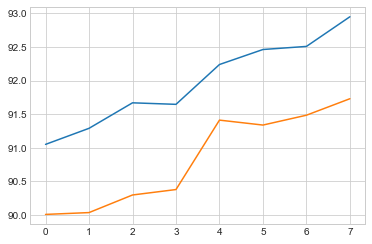

In [69]:
plt.plot(latinliteracy)
plt.plot(brazil2009)

In [70]:
plt.close()

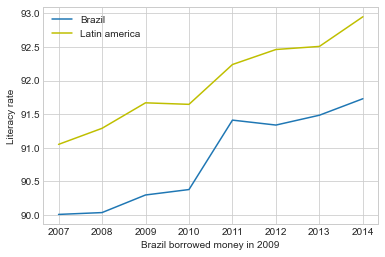

In [96]:
x = range(2007,2015)
y1 = brazil2009
y2 = latinliteracy
plt.plot(x,y1,'-')
plt.plot(x,y2,'-',color = 'y')
plt.xlabel('Brazil borrowed money in 2009')
plt.ylabel('Literacy rate')
plt.legend(['Brazil','Latin america'])
plt.show()

In [75]:
plt.close()

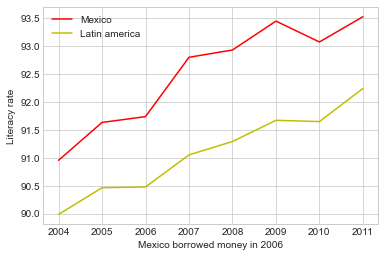

In [94]:
x = range(2004,2012)
y1 = mexico2006
y2 = latinliteracy
plt.plot(x,y1,'-',color = 'r')
plt.plot(x,y2,'-',color = 'y')
plt.xlabel('Mexico borrowed money in 2006')
plt.ylabel('Literacy rate')
plt.legend(['Mexico','Latin america'])
plt.show()